In [1]:
# Importing All the Essential Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Making My Plots Pretty
sns.set()

In [6]:
# Importing DataFrame for EDA
df = pd.read_csv('final_test.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 5881
Data columns (total 31 columns):
hospital_name           5882 non-null object
state                   5882 non-null object
readmission_ratio       5882 non-null float64
predicted_rate          5882 non-null float64
expected_rate           5882 non-null float64
zip                     5882 non-null int64
hhc_count               5882 non-null int64
nursing_care            5882 non-null int64
physical_therapy        5882 non-null float64
occupational_therapy    5882 non-null float64
pathology_services      5882 non-null float64
medical_soc_services    5882 non-null float64
home_health_aid         5882 non-null float64
star_rating             5882 non-null float64
timeliness              5882 non-null float64
rx_ed                   5882 non-null float64
fall_risk               5882 non-null float64
depression_check        5882 non-null float64
flu_shot                5882 non-null float64
pneumonia_shot          588

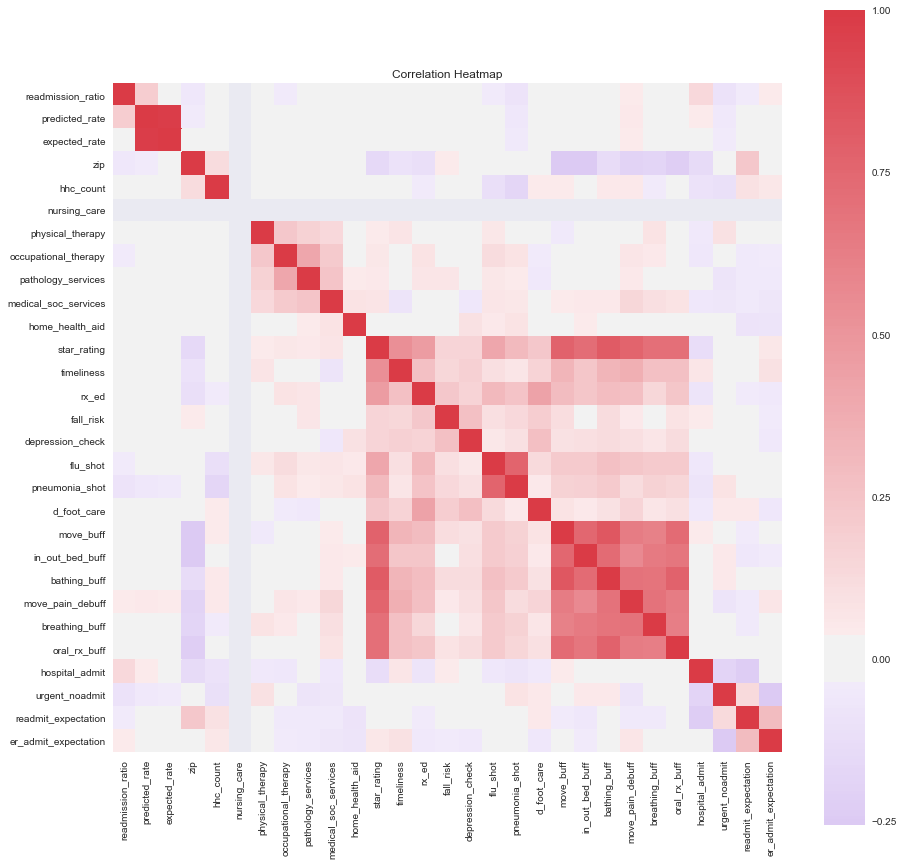

In [3]:
# Create Correlation Matrix to See Noteable Correlaitons
f, ax = plt.subplots(figsize=(15, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(999, 10, as_cmap=True),
            center=0,square=True, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

In [4]:
def line_reg(x,y,data,reg=True):
    """This function plots the linear regression of two dataframe columns and adds the pearson
    correlation coefficient to the chart."""
    # Initializing Text Axes
    f=plt.figure()
    ax = f.add_subplot(111)
    
    # Plots Initial Scatter Plot
    _ = sns.regplot(x=x, y=y, data =data, fit_reg=reg)
    
    # Add Pearson Correlation Coeffecient to the Plot
    plt.margins(.02)
    core_mat = np.corrcoef(data[x],data[y])
    pcore = core_mat[0,1]
    text = 'p: %s\n'%(round(pcore,2))
    _ = plt.text(0.1, 0.9,text, ha='center', va='center', transform = ax.transAxes)

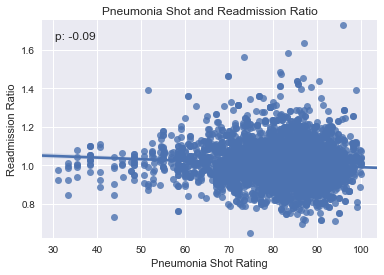

In [9]:
# Plotting Scatter Plot of Pneumonia Shot and Readmission Ratios
_ = line_reg('pneumonia_shot','readmission_ratio',df)
_ = plt.xlabel('Pneumonia Shot Rating')
_ = plt.ylabel('Readmission Ratio')
_ = plt.title('Pneumonia Shot and Readmission Ratio')
plt.show()